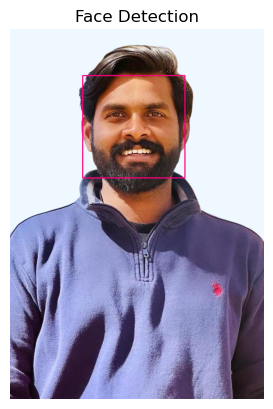

In [5]:
# Face Detection
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load the image and convert it to grayscale
image = cv2.imread('Image.png')
if image is None:
    print("Image not found or unable to load")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    # Check for no faces detected
    if len(faces) == 0:
        print("No faces found")
    else:
        # Draw rectangles around each face
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (127, 0, 255), 2)

        # Convert BGR image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image with detected faces using Matplotlib
        plt.imshow(image_rgb)
        plt.title('Face Detection')
        plt.axis('off')  # Hide the axis
        plt.show()


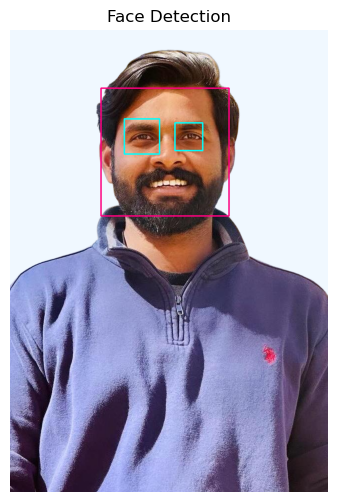

In [13]:
#Eye and Face Detection
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the Haar Cascade classifiers
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

# Load the image
img = cv2.imread('Image.png')
if img is None:
    print("Image not found or unable to load.")
else:
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        print("No Face Found")
    else:
        for (x, y, w, h) in faces:
            # Draw rectangle around face
            cv2.rectangle(img, (x, y), (x+w, y+h), (127, 0, 255), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            # Detect eyes within the face region
            eyes = eye_classifier.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 0), 2)

        # Convert the image from BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image using Matplotlib
        plt.figure(figsize=(10, 6))
        plt.imshow(img_rgb)
        plt.title('Face Detection')
        plt.axis('off')  # Hide axes ticks
        plt.show()


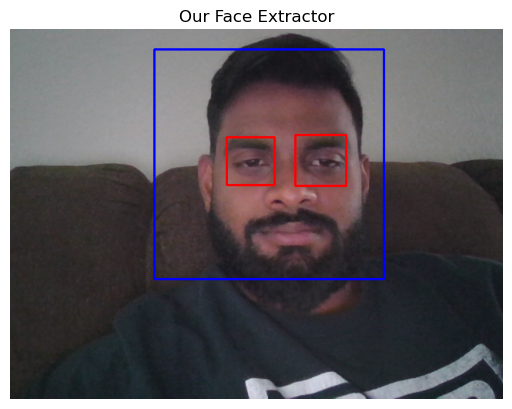

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output

# Load the Haar Cascade classifiers
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return img, False

    for (x, y, w, h) in faces:
        x = max(0, x - 50)
        y = max(0, y - 50)
        w += 50
        h += 50
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)

    return img, True

cap = cv2.VideoCapture(0)  # Open video capture

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        processed_frame, detected = face_detector(frame)
        if detected:
            # Convert BGR to RGB
            frame_rgb = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)
            plt.imshow(frame_rgb)
            plt.title('Our Face Extractor')
            plt.axis('off')
            display(plt.gcf())  # Display the current figure
            clear_output(wait=True)  # Clear the output for the next frame
except KeyboardInterrupt:
    print("Stopped by User")
finally:
    cap.release()
    plt.close()
